In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime

In [2]:
x = input("Enter a Stock Ticker")
df = yf.download(x)
today = datetime.today()
today = today.strftime("%Y %m %d")
#Make sure the the ranged entered is at least a year long
df = df.loc["2023-01-01":today].copy()
upper = 75
lower = 40
df.head()
df.tail()

[*********************100%%**********************]  1 of 1 completed

400


Text(0.5, 1.0, 'AAPL EMA Crossover')

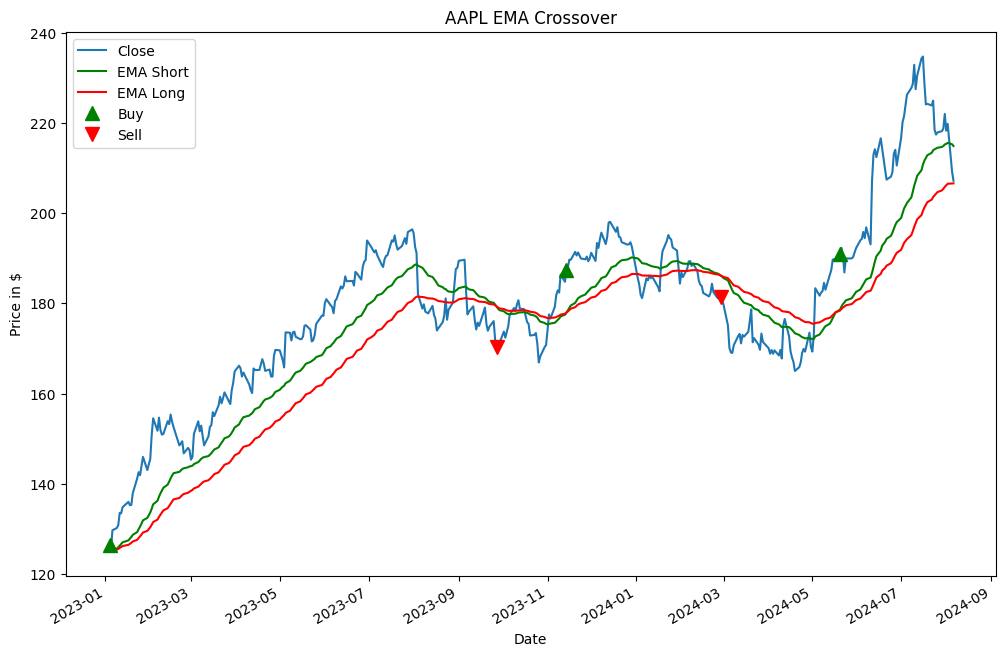

In [3]:
df['ema_short'] = df['Close'].ewm(span=lower, adjust=False).mean()
df['ema_long'] = df['Close'].ewm(span=upper, adjust=False).mean()

df['EMAbullish'] = 0.0
df['EMAbullish'] = np.where(df['ema_short'] > df['ema_long'], 1.0, 0.0)
df['EMAcrossover'] = df['EMAbullish'].diff()



fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(111, ylabel='Price in $')

df['Close'].plot(ax=ax1)
df['ema_short'].plot(ax=ax1, color='g')
df['ema_long'].plot(ax=ax1, color='r')

ax1.plot(df.loc[df.EMAcrossover == 1.0].index, 
         df.Close[df.EMAcrossover == 1.0],
         '^', markersize=10, color='g')
ax1.plot(df.loc[df.EMAcrossover == -1.0].index, 
         df.Close[df.EMAcrossover == -1.0],
         'v', markersize=10, color='r')
plt.legend(['Close', 'EMA Short', 'EMA Long', 'Buy', 'Sell'])
plt.title(x +' EMA Crossover')